### Prepare UCDP Peace Agreement Dataset

In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from datetime import datetime, date, timedelta
import numpy as np

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define out paths ------
if not os.path.exists('/Users/hannahfrank/desktop/qca_peace_agreements_out'):
    os.makedirs('/Users/hannahfrank/desktop/qca_peace_agreements_out')

out_paths = {
    "desciptive_plots_outcome": '/Users/hannahfrank/desktop/qca_peace_agreements_out/desciptive_plots_outcome',
    "data": '/Users/hannahfrank/desktop/qca_peace_agreements_out/data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["data"]

'/Users/hannahfrank/desktop/qca_peace_agreements_out/data'

In [3]:
### UCDP Peace Agreement Dataset version 19.1 ----------
# Codebook: https://ucdp.uu.se/downloads/peace/ucdp-codebook-peace-agreements-191.pdf

ucdp = pd.read_csv("https://ucdp.uu.se/downloads/peace/ucdp-peace-agreements-191.csv.zip")
ucdp.head(3)

,paid,region,gwno,conflict_id,conflict_name,dyad_id,dyad_name,actor_id,actor_name,incompatibility,...,linktofulltextagreement,inclusive,no dyad,pa type,out_iss,procID,frame,version,dateintervalstart meta,dateintervalend meta
0,1565,3,700,333,Afghanistan: Government,"729, 726, 727, 725, 730, 732",Government of Afghanistan - Mahaz-i Milli-yi I...,"130, 296, 299, 294, 293, 297, 300","Government of Afghanistan, Mahaz-i Milli-yi Is...",2,...,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,6,2,2,105,1,19.1,1975-01-01,2018-12-31
1,1128,3,700,333,Afghanistan: Government,"726, 732",Government of Afghanistan - Hizb-i Islami-yi A...,"300, 130, 130, 299, 300","Hizb-i Wahdat, Government of Afghanistan, Gove...",2,...,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,2,2,3,1,2,19.1,1975-01-01,2018-12-31
2,1132,3,700,333,Afghanistan: Government,726,Government of Afghanistan - Hizb-i Islami-yi A...,"130, 299","Government of Afghanistan, Hizb-i Islami-yi Af...",2,...,NaN,2,1,2,3,1,3,19.1,1975-01-01,2018-12-31


In [4]:
### Print columns in df  -------
for col in ucdp.columns:
    print(col)

paid
region
gwno
conflict_id
conflict_name
dyad_id
dyad_name
actor_id
actor_name
incompatibility
pa_name
year
pa_date
pa_comment
pa_sign
c_sign
pa_3rd
c_3rd
ended
duration
c_duration
cease
intarmy
ddr
withd
mil prov
pp
intgov
intciv
elections
interrim
natalks
shagov
pol prov
aut
fed
ind
ref 
shaloc
regdev
cul
demarcation
locgov
terr prov
amn
pris
recon
return 
justice prov
reaffirm
reaffirmid
outlin
pko
gender
co impl
active_conflict
termdur
txt
linktofulltextagreement
inclusive
no dyad
pa type
out_iss
procID
frame
version
dateintervalstart meta
dateintervalend meta


In [5]:
### Make subset of columns needed -----
ucdp_s = ucdp[["paid", 
               "gwno",
               "dyad_name",
               "dyad_id",
               "incompatibility",
               "pa_name",
               "year",
               "pa_date",
               "pa_comment",
               "pa_sign",
               "c_sign",
               "pa_3rd",
               "c_3rd",
               "ended",
               "duration",
               "c_duration",
               "cease",
               "intarmy",
               "ddr",
               "withd",
               "mil prov",
               "pp",
               "intgov",
               "intciv",
               "elections",
               "interrim",
               "natalks",
               "shagov",
               "pol prov", 
               "aut",
               "fed",
               "ind",
               #"ref",
               "shaloc",
               "regdev",
               "cul",
               "demarcation",
               "locgov",
               "terr prov",
               "amn",
               "pris",
               "recon",
               #"return", 
               "justice prov", 
               "reaffirm",
               "reaffirmid",
               "outlin",
               "pko",
               "gender",
               "co impl", 
               "active_conflict",
               "termdur", 
               "txt", 
               "linktofulltextagreement", 
               "inclusive", 
               "no dyad",
               "pa type", 
               "out_iss",
               "frame"]].copy()

ucdp_s.head(3)

,paid,gwno,dyad_name,dyad_id,incompatibility,pa_name,year,pa_date,pa_comment,pa_sign,...,co impl,active_conflict,termdur,txt,linktofulltextagreement,inclusive,no dyad,pa type,out_iss,frame
0,1565,700,Government of Afghanistan - Mahaz-i Milli-yi I...,"729, 726, 727, 725, 730, 732",2,Peshawar Accord,1992,1992-04-24,Partial Peace Agreement \n\nThis agreement set...,"No signatures, but agreement mentions: Jamiat-...",...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,6,2,2,1
1,1128,700,Government of Afghanistan - Hizb-i Islami-yi A...,"726, 732",2,Afghan Peace Accord and Annex on the Division ...,1993,1993-03-07,Partial peace agreement \n\nA number of war...,Professor Burhan-ud-Din Rabbani of Jamiat-i-Is...,...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,2,2,3,2
2,1132,700,Government of Afghanistan - Hizb-i Islami-yi A...,726,2,Jalalabad accord,1993,1993-05-20,Partial peace agreement.\n\nThe Jalalabad Acco...,"Burhanuddin Rabbani, President \nGulbuddin Hek...",...,0,1,-99,0,NaN,2,1,2,3,3


In [6]:
### Code outcome variable -- durability of peace --------   

# Make empty columns
ucdp_s["y_duration_days"] = 0
ucdp_s["y_duration_months"] = 0

# Convert duration variable, day and month, into date format
ucdp_s['duration_d'] = pd.to_datetime(ucdp_s['duration'], format="%Y-%m-%d")
ucdp_s['duration_m'] = ucdp_s['duration_d'].dt.to_period('M').astype(int)

# Convert date variable, day and month, into date format
ucdp_s['pa_date_d'] = pd.to_datetime(ucdp_s['pa_date'], format="%Y-%m-%d")
ucdp_s['pa_date_m'] = ucdp_s['pa_date_d'].dt.to_period('M').astype(int)

# Calculate difference between the date of signing the agreement and the date when it ended
# for months and days
ucdp_s.loc[ucdp_s['ended'] == True, "y_duration_days"] = ucdp_s["duration_d"] - ucdp_s["pa_date_d"] 
ucdp_s.loc[ucdp_s['ended'] == True, "y_duration_months"] = ucdp_s["duration_m"] - ucdp_s["pa_date_m"] 

# Convert duration days variable into actual counts of days
for index, row in ucdp_s.iterrows():
    if type(ucdp_s["y_duration_days"][index])==pd._libs.tslibs.timedeltas.Timedelta:
        ucdp_s["y_duration_days"].iloc[index] = ucdp_s["y_duration_days"].iloc[index].days

# Check results    
ucdp_s.head(3)

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,paid,gwno,dyad_name,dyad_id,incompatibility,pa_name,year,pa_date,pa_comment,pa_sign,...,no dyad,pa type,out_iss,frame,y_duration_days,y_duration_months,duration_d,duration_m,pa_date_d,pa_date_m
0,1565,700,Government of Afghanistan - Mahaz-i Milli-yi I...,"729, 726, 727, 725, 730, 732",2,Peshawar Accord,1992,1992-04-24,Partial Peace Agreement \n\nThis agreement set...,"No signatures, but agreement mentions: Jamiat-...",...,6,2,2,1,0,0,NaT,-9223372036854775808,1992-04-24,267
1,1128,700,Government of Afghanistan - Hizb-i Islami-yi A...,"726, 732",2,Afghan Peace Accord and Annex on the Division ...,1993,1993-03-07,Partial peace agreement \n\nA number of war...,Professor Burhan-ud-Din Rabbani of Jamiat-i-Is...,...,2,2,3,2,66,2,1993-05-12,280,1993-03-07,278
2,1132,700,Government of Afghanistan - Hizb-i Islami-yi A...,726,2,Jalalabad accord,1993,1993-05-20,Partial peace agreement.\n\nThe Jalalabad Acco...,"Burhanuddin Rabbani, President \nGulbuddin Hek...",...,1,2,3,3,226,8,1994-01-01,288,1993-05-20,280


In [7]:
### Fix Malaysia -----
# A number of peace agreements in Malaysia seem to have never failed, the method used above returns incorrect values.
# The duration of the peace agreement is recoded manually for the five agreements by subtracting the date of 
# signing the agreement from 'today'

# Get date for today
today = datetime.today()

ucdp_s.loc[(ucdp_s["paid"]==1470), 
           "y_duration_days"] = (today - datetime.strptime((ucdp_s["pa_date"].loc[(ucdp_s["paid"]==1470)].values[0]), 
                                                                                                         "%Y-%m-%d")).days 
ucdp_s.loc[(ucdp_s["paid"]==1471), 
           "y_duration_days"] = (today - datetime.strptime((ucdp_s["pa_date"].loc[(ucdp_s["paid"]==1471)].values[0]), 
                                                                                                          "%Y-%m-%d")).days 
ucdp_s.loc[(ucdp_s["paid"]==1472), 
           "y_duration_days"] = (today - datetime.strptime((ucdp_s["pa_date"].loc[(ucdp_s["paid"]==1472)].values[0]), 
                                                                                                          "%Y-%m-%d")).days 
ucdp_s.loc[(ucdp_s["paid"]==1476), 
           "y_duration_days"] = (today - datetime.strptime((ucdp_s["pa_date"].loc[(ucdp_s["paid"]==1476)].values[0]), 
                                                                                                          "%Y-%m-%d")).days 
ucdp_s.loc[(ucdp_s["paid"]==1478), 
           "y_duration_days"] = (today - datetime.strptime((ucdp_s["pa_date"].loc[(ucdp_s["paid"]==1478)].values[0]), 
                                                                                                          "%Y-%m-%d")).days 

In [8]:
### Fix Malaysia -----
# The dame procedure is applied to the month variable. 

# Get date for today in year-month
today = np.datetime64('today').astype('datetime64[M]')

ucdp_s.loc[(ucdp_s["paid"]==1470), 
           "y_duration_months"] = (today - ucdp_s["pa_date_d"].loc[(ucdp_s["paid"]==1470)].values[0].astype('datetime64[M]')).astype(int)

ucdp_s.loc[(ucdp_s["paid"]==1471), 
           "y_duration_months"] = (today - ucdp_s["pa_date_d"].loc[(ucdp_s["paid"]==1471)].values[0].astype('datetime64[M]')).astype(int)

ucdp_s.loc[(ucdp_s["paid"]==1472), 
           "y_duration_months"] = (today - ucdp_s["pa_date_d"].loc[(ucdp_s["paid"]==1472)].values[0].astype('datetime64[M]')).astype(int)

ucdp_s.loc[(ucdp_s["paid"]==1476), 
           "y_duration_months"] = (today - ucdp_s["pa_date_d"].loc[(ucdp_s["paid"]==1476)].values[0].astype('datetime64[M]')).astype(int)

ucdp_s.loc[(ucdp_s["paid"]==1478), 
           "y_duration_months"] = (today - ucdp_s["pa_date_d"].loc[(ucdp_s["paid"]==1478)].values[0].astype('datetime64[M]')).astype(int)

In [9]:
### Recode negative duration as 0 -----
# I assume that these are peace agreements which failed before they were signed. 
ucdp_s.loc[ucdp_s["y_duration_months"]== -7]

,paid,gwno,dyad_name,dyad_id,incompatibility,pa_name,year,pa_date,pa_comment,pa_sign,...,no dyad,pa type,out_iss,frame,y_duration_days,y_duration_months,duration_d,duration_m,pa_date_d,pa_date_m
87,1024,581,Government of Comoros - MPA/Republic of Anjouan,860,1,The Famboni Declaration,2000,2000-08-26,Partial peace agreement\n\nThe Famboni Declara...,Colonel Azali Assoumani (head of the military ...,...,1,2,3,1,-238,-7,2000-01-01,360,2000-08-26,367


In [10]:
### Recode negative duration as 0 -----
ucdp_s.loc[(ucdp_s["paid"]==1024), 
           "y_duration_months"] = 0

ucdp_s.loc[(ucdp_s["paid"]==1024), 
           "y_duration_days"] = 0

In [11]:
### Make subset of columns, only include relevant variables -----
ucdp_s = ucdp_s[["paid",
               "gwno",
               "dyad_id",
               "incompatibility",
               "dyad_name",
               "pa_name",
               "year",
               "pa_date",
               "pa_comment",
               "pa_sign",
               "c_sign",
               "pa_3rd",
               "c_3rd",
               "ended",
               "duration",
               "c_duration",
               "y_duration_days",
               "y_duration_months",
               "cease",
               "intarmy",
               "ddr",
               "withd",
               "mil prov",
               "pp",
               "intgov",
               "intciv",
               "elections",
               "interrim",
               "natalks",
               "shagov",
               "pol prov",
               "aut",
               "fed",
               "ind",
               #"ref",
               "shaloc",
               "regdev",
               "cul",
               "demarcation",
               "locgov",
               "terr prov",
               "amn",
               "pris",
               "recon",
               #"return", 
               "justice prov", 
               "reaffirm",
               "reaffirmid",
               "outlin",
               "pko",
               "gender",
               "co impl", 
               "active_conflict",
               "termdur", 
               "txt", 
               "linktofulltextagreement", 
               "inclusive", 
               "no dyad",
               "pa type", 
               "out_iss",
               "frame"]].copy()

ucdp_s.head(3)

,paid,gwno,dyad_id,incompatibility,dyad_name,pa_name,year,pa_date,pa_comment,pa_sign,...,co impl,active_conflict,termdur,txt,linktofulltextagreement,inclusive,no dyad,pa type,out_iss,frame
0,1565,700,"729, 726, 727, 725, 730, 732",2,Government of Afghanistan - Mahaz-i Milli-yi I...,Peshawar Accord,1992,1992-04-24,Partial Peace Agreement \n\nThis agreement set...,"No signatures, but agreement mentions: Jamiat-...",...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,6,2,2,1
1,1128,700,"726, 732",2,Government of Afghanistan - Hizb-i Islami-yi A...,Afghan Peace Accord and Annex on the Division ...,1993,1993-03-07,Partial peace agreement \n\nA number of war...,Professor Burhan-ud-Din Rabbani of Jamiat-i-Is...,...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,2,2,3,2
2,1132,700,726,2,Government of Afghanistan - Hizb-i Islami-yi A...,Jalalabad accord,1993,1993-05-20,Partial peace agreement.\n\nThe Jalalabad Acco...,"Burhanuddin Rabbani, President \nGulbuddin Hek...",...,0,1,-99,0,NaN,2,1,2,3,3


In [12]:
### Only consider peace agreements with full text access ---------
ucdp_full = ucdp_s.loc[ucdp_s["txt"]==1]
ucdp_full.head(3)

,paid,gwno,dyad_id,incompatibility,dyad_name,pa_name,year,pa_date,pa_comment,pa_sign,...,co impl,active_conflict,termdur,txt,linktofulltextagreement,inclusive,no dyad,pa type,out_iss,frame
0,1565,700,"729, 726, 727, 725, 730, 732",2,Government of Afghanistan - Mahaz-i Milli-yi I...,Peshawar Accord,1992,1992-04-24,Partial Peace Agreement \n\nThis agreement set...,"No signatures, but agreement mentions: Jamiat-...",...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,6,2,2,1
1,1128,700,"726, 732",2,Government of Afghanistan - Hizb-i Islami-yi A...,Afghan Peace Accord and Annex on the Division ...,1993,1993-03-07,Partial peace agreement \n\nA number of war...,Professor Burhan-ud-Din Rabbani of Jamiat-i-Is...,...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,2,2,3,2
4,1488,700,726,2,Government of Afghanistan - Hizb-i Islami-yi A...,Kabul Agreement,2016,2016-09-22,Full peace agreement\n\nAfter periods of negot...,For the Government of Afghanistan: President M...,...,1,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,1,1,0,2


### Check coding 
    Outcome

(array([322.,   7.,  17.,   6.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  25.2,  50.4,  75.6, 100.8, 126. , 151.2, 176.4, 201.6,
        226.8, 252. ]),
 <BarContainer object of 10 artists>)

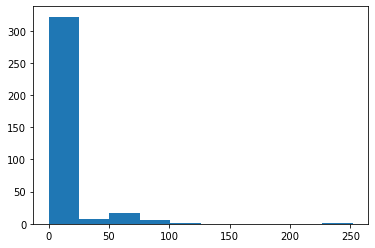

In [13]:
### Check distribution of duration variable, months ------
plt.hist(ucdp_s.y_duration_months)

(array([322.,   7.,  17.,   6.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.0, 768.7, 1537.4, 2306.1000000000004, 3074.8, 3843.5,
        4612.200000000001, 5380.900000000001, 6149.6, 6918.3, 7687.0],
       dtype=object),
 <BarContainer object of 10 artists>)

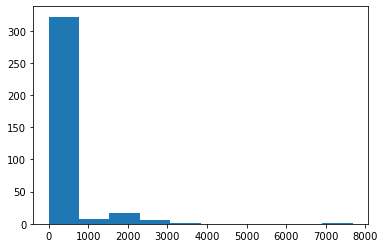

In [14]:
### Check distribution of duration variable, days ------
plt.hist(ucdp_s.y_duration_days)

In [15]:
### Min, max, mean of duration, months ----
print(ucdp_s.y_duration_months.min())
print(ucdp_s.y_duration_months.max())
print(ucdp_s.y_duration_months.mean())

0
252
8.385915492957746


In [16]:
### Min, max, mean of duration, days ----
print(ucdp_s.y_duration_days.min())
print(ucdp_s.y_duration_days.max())
print(ucdp_s.y_duration_days.mean())

0
7687
255.05352112676056


In [17]:
### Reset index -------
ucdp_s.reset_index(drop=False, inplace=False)
ucdp_s.head(3)

,paid,gwno,dyad_id,incompatibility,dyad_name,pa_name,year,pa_date,pa_comment,pa_sign,...,co impl,active_conflict,termdur,txt,linktofulltextagreement,inclusive,no dyad,pa type,out_iss,frame
0,1565,700,"729, 726, 727, 725, 730, 732",2,Government of Afghanistan - Mahaz-i Milli-yi I...,Peshawar Accord,1992,1992-04-24,Partial Peace Agreement \n\nThis agreement set...,"No signatures, but agreement mentions: Jamiat-...",...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,6,2,2,1
1,1128,700,"726, 732",2,Government of Afghanistan - Hizb-i Islami-yi A...,Afghan Peace Accord and Annex on the Division ...,1993,1993-03-07,Partial peace agreement \n\nA number of war...,Professor Burhan-ud-Din Rabbani of Jamiat-i-Is...,...,0,1,-99,1,http://ucdpged.uu.se/peaceagreements/fulltext/...,2,2,2,3,2
2,1132,700,726,2,Government of Afghanistan - Hizb-i Islami-yi A...,Jalalabad accord,1993,1993-05-20,Partial peace agreement.\n\nThe Jalalabad Acco...,"Burhanuddin Rabbani, President \nGulbuddin Hek...",...,0,1,-99,0,NaN,2,1,2,3,3


### Quick descriptive analysis
    Outcome

In [18]:
### Check how many peace agreements have ended ------
print(ucdp_s[ucdp_s.ended == True].shape[0]) 
print(ucdp_s[ucdp_s.ended == False].shape[0]) 

132
223


In [19]:
### Which peace agreements were successful for period 1990-2008 ----
print(f"unsuccessful 1990-2008") 
print(len(ucdp_s.loc[(ucdp_s['year']<2008) &
                     (ucdp_s['year']<=1990) &
          (ucdp_s['ended']==True)]))

print(f"successful 1990-2008") 
print(len(ucdp_s.loc[(ucdp_s["year"]<2008) &
                     (ucdp_s["year"]<=1990) &
          (ucdp_s["ended"]==False)]))

20/(28+20)

unsuccessful 1990-2008
28
successful 1990-2008
20


0.4166666666666667

In [20]:
### Which peace agreements were successful for period 2008-2018 ----
print(f"unsuccessful 2008-2018") 
print(len(ucdp_s.loc[(ucdp_s["year"]>=2008) &
          (ucdp_s["ended"]==True)]))

print(f"successful 2008-2018") 
print(len(ucdp_s.loc[(ucdp_s["year"]>=2008) &
          (ucdp_s["ended"]==False)]))

48/(48+25)

unsuccessful 2008-2018
25
successful 2008-2018
48


0.6575342465753424

In [21]:
### Min max of years ------
print(ucdp_s.year.min())
print(ucdp_s.year.max())

1975
2018


In [22]:
### Save dataset -----------
ucdp_s.to_csv(os.path.join(out_paths["data"], 
                           "ucdp.csv"), index=False, sep=',')